In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/andrea/Documentos/material curso ML/dogs-vs-cats/train'

In [3]:
base_dir = '/home/andrea/Documentos/cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [6]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [7]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [8]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [9]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [10]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
print('total training cat images:', len(os.listdir(train_cats_dir)))test_dir = os.path.join(base_dir, 'test')

total training cat images: 1000


In [25]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [26]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [27]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [28]:
print('total ttest_dogs_dir = os.path.join(test_dir, 'dogs')est cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [29]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [3]:
base_dir = '/home/andrea/Documentos/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
#directorios de gatos
train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
#directorios de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Construir la red convolucional

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras import optimizers

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Preprocesamiento de los datos

1. Leer imágenes
2. Decodificar JPG a matriz RGB de pixeles
3. Convertir puntos flotantes en tensores
4. Escalar pixeles valores[0,255]

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ImageDataGenerator convierne automaticamente imágenes en tensores preprocesados

#### Generador en python
Un generador es un objeto que actua como un iterador, usan el operador "yield"

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255) #todos los pixeles estarán entre 0 y 255
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), #Rescala las imagenes a 150x150
    batch_size=20,
    class_mode='binary') #Solo dos clases (perro,gato)

Found 2000 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


fit_generator es equivalente a fit, como argumento espera un objeto del tipo generador que arroja bloques de las imágenes de entrada.
Es necesario especificar el número de pasos por época, recordemos que tenemos 2000 datos de entrenamiento y el objeto Generador toma bloque de 20, entonces 20*100 = 2000.

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 33s 331ms/step - loss: 0.6835 - accuracy: 0.5580 - val_loss: 0.6629 - val_accuracy: 0.6130
Epoch 2/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6503 - accuracy: 0.6300 - val_loss: 0.6452 - val_accuracy: 0.6230
Epoch 3/30
100/100 [==============================] - 32s 318ms/step - loss: 0.6139 - accuracy: 0.6765 - val_loss: 0.7017 - val_accuracy: 0.5710
Epoch 4/30
100/100 [==============================] - 32s 318ms/step - loss: 0.5741 - accuracy: 0.6935 - val_loss: 0.6382 - val_accuracy: 0.6090
Epoch 5/30
100/100 [==============================] - 32s 321ms/step - loss: 0.5413 - accuracy: 0.7225 - val_loss: 0.5875 - val_accuracy: 0.6810
Epoch 6/30
100/100 [==============================] - 32s 322ms/step - loss: 0.5153 - accuracy: 0.7425 - val_loss: 0.5552 - val_accuracy: 0.7050
Epoch 7/30
100/100 [==============================] - 32s 321ms/step - loss: 0.4898 - accuracy: 0.7625 - val_loss: 0.6474 - val_ac

In [16]:
model.save('cats_and_dogs_small_1.h5') #Salvar el modelo después del entrenamiento

# Imprimir curvas de precisión y pérdida durante el entrenamiento

In [17]:
import matplotlib.pyplot as plt

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs = range(1, len(acc) + 1)

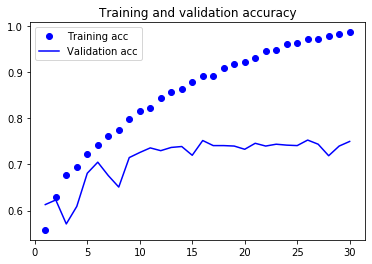

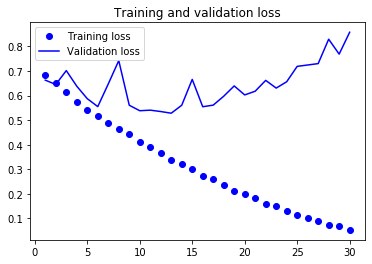

In [22]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data augmentation

Las gráficas anteriores muestran que el modelo sufre de sobreajuste, debido a la baja cantidad de datos el modelo no es capaz de generalizar. Data augmenting es generar de forma artificial mas datos de entrenamiento de los datos existentes por medio de transformaciones aleatorias.

In [24]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Propiedades de este generador pueden ser consultadas en: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

- *rotation_range* es un valor en grados (0-180)
- *width_shift* y *height_shift* son rangos de los cuáles una imagen se puede trasladar vertical u horizontalmente
- *shear_range* aplicar de forma aleatoria cortes
- *zoom_range* aleatoriamente aplicar zoom
- *horizontal_flip*  voltear la imagen horizontalmente(importante cuando no se asume simetría horizonal)
- *fill_mode* llenar los pixeles nuevos que fueron creados en las transformaciones anteriores


In [25]:
from tensorflow.keras.preprocessing import image

In [26]:
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]

In [28]:
img_path = fnames[3] # Se elige una imagen a aumentar

In [29]:
img = image.load_img(img_path, target_size=(150, 150)) # lee la imagen y se ajusta al tamaño 150x150

In [31]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

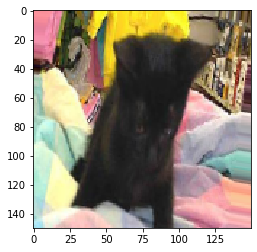

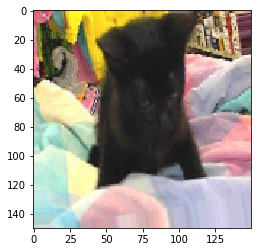

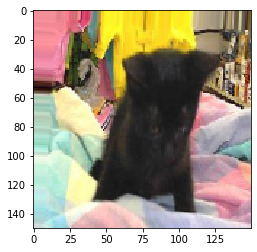

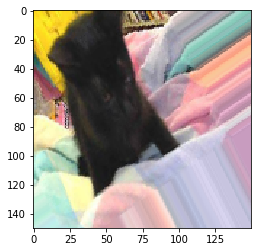

In [32]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

# Crear una nueva convnet con dropout

In [34]:
model = models.Sequential()

In [35]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy'])

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [40]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 50s 497ms/step - loss: 0.6928 - accuracy: 0.5207 - val_loss: 0.6874 - val_accuracy: 0.5279
Epoch 2/100
100/100 [==============================] - 49s 489ms/step - loss: 0.6799 - accuracy: 0.5587 - val_loss: 0.6552 - val_accuracy: 0.6104
Epoch 3/100
100/100 [==============================] - 49s 490ms/step - loss: 0.6666 - accuracy: 0.5892 - val_loss: 0.6424 - val_accuracy: 0.6180
Epoch 4/100
100/100 [==============================] - 49s 491ms/step - loss: 0.6443 - accuracy: 0.6266 - val_loss: 0.6145 - val_accuracy: 0.6478
Epoch 5/100
100/100 [==============================] - 49s 490ms/step - loss: 0.6182 - accuracy: 0.6489 - val_loss: 0.5903 - val_accuracy: 0.6764
Epoch 6/100
100/100 [==============================] - 49s 489ms/step - loss: 0.6052 - accuracy: 0.6758 - val_loss: 0.5755 - val_accuracy: 0.6802
Epoch 7/100
100/100 [==============================] - 49s 492ms/step - loss: 0.5976 - accuracy: 0.6749 - val_loss: 0.5737 -

Epoch 57/100
100/100 [==============================] - 53s 530ms/step - loss: 0.4197 - accuracy: 0.8018 - val_loss: 0.4440 - val_accuracy: 0.7963
Epoch 58/100
100/100 [==============================] - 52s 523ms/step - loss: 0.4215 - accuracy: 0.8024 - val_loss: 0.4576 - val_accuracy: 0.7836
Epoch 59/100
100/100 [==============================] - 53s 528ms/step - loss: 0.4192 - accuracy: 0.8008 - val_loss: 0.4754 - val_accuracy: 0.7766
Epoch 60/100
100/100 [==============================] - 52s 523ms/step - loss: 0.4165 - accuracy: 0.8081 - val_loss: 0.5200 - val_accuracy: 0.7678
Epoch 61/100
100/100 [==============================] - 53s 525ms/step - loss: 0.4130 - accuracy: 0.8093 - val_loss: 0.4876 - val_accuracy: 0.7728
Epoch 62/100
100/100 [==============================] - 52s 524ms/step - loss: 0.4101 - accuracy: 0.8100 - val_loss: 0.4249 - val_accuracy: 0.8052
Epoch 63/100
100/100 [==============================] - 53s 529ms/step - loss: 0.4128 - accuracy: 0.8156 - val_loss: 0

In [42]:
model.save('cats_and_dogs_small_2.h5')

In [43]:
acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

In [44]:
epochs = range(1, len(acc1) + 1)

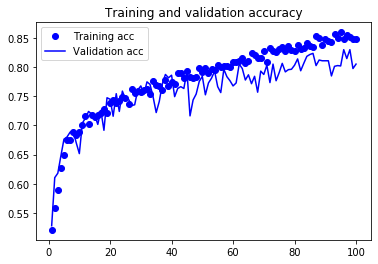

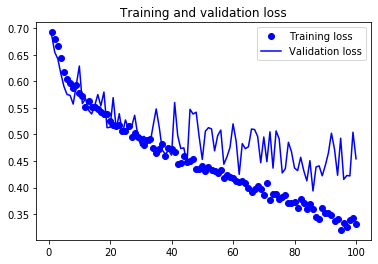

In [45]:
plt.plot(epochs, acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss1, 'bo', label='Training loss')
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()